<a href="https://colab.research.google.com/github/elooo3/Automobile-Dataset/blob/main/Ope_Auto%20varying%20percentages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Opeoluwa Obembe
## Date: 8th of December 2020
### Project: Automobile Dataset
##### Project Type : Regression
#### Project Aim: Predict Car Price using provided attributes

In [59]:
# import libraries
!pip install category-encoders
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import category_encoders as ce

%matplotlib inline

plt.rcParams['figure.figsize'] = (8,6) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print("Installtion completed successfully!")

Installtion completed successfully!


In [60]:
# Import dataset and print first 10 rows
dataset = pd.read_csv('imports-85.data',header = None,  sep = ',')
dataset.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [61]:
# Add column names as they are missing from raw data

columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
                'drive-wheels', 'engine-location', 'wheel-base','length', 'width', 'height',
                'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size','fuel-system',
                'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
                'highway-mpg','price']

print('Total number of columns in Automobile dataset =' , len(columns))

dataset.columns = columns
dataset.head()

Total number of columns in Automobile dataset = 26


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [62]:
# search through and replace missing values with 'NaN'
dataset.replace('?',np.NAN, inplace= True)

# check for and print total number of missing values
missing = dataset.isnull().sum().sum()
print("Total no of missing values add up to " ,missing)

Total no of missing values add up to  59


In [63]:
# Handling missing values
df = dataset.copy()

# Check for missing values in each column
df.isnull().sum()


symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [64]:
# Check data types and update where necessary
#print(df.dtypes)

#we don't want missing values in target variable and since only few missing values, drop them
df.dropna(subset=['price'], axis = 0, inplace= True)

# Ensure proper dataypes
df[['bore','stroke', 'horsepower','peak-rpm']] = df[['bore','stroke','horsepower','peak-rpm']].astype('float')
df['normalized-losses'] = df['normalized-losses'].astype('float')
df['price'] = df['price'].astype('int')
print(df.dtypes)

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


In [65]:
# Split numerical and categorical columns in dataframe
numerical_col = df.select_dtypes(include = ['float','int']).columns
categorical_col = [col  for col in df.columns if df[col].dtype == "object"]

print('Categorical Columns: ',categorical_col)
#print('-'*50)
print('\n Numerical Columns: ',numerical_col)

Categorical Columns:  ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']

 Numerical Columns:  Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [66]:
# Handling missing values in the numerical columns
for col in numerical_col:
    df[col].fillna(df[col].mean(), inplace = True)

# Handling missing values in the categorical columns
for col in categorical_col:
    df[col].fillna(df[col].mode()[0], inplace = True)

# Check that there are no more missing values 
print("Total number of  missing vaues in updated dataset is :" , df.isnull().sum().sum())

Total number of  missing vaues in updated dataset is : 0


In [67]:
df.to_csv('CleanAuto.csv')

##Exploratory Data Analysis

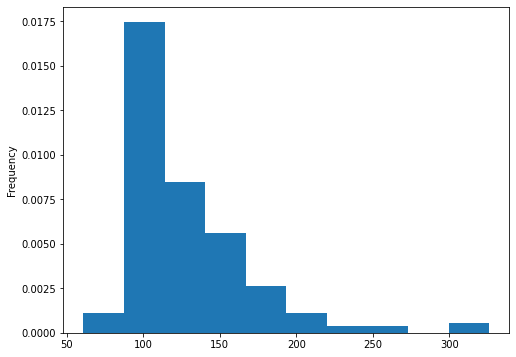

In [68]:
## Maximum Likelihood Estimation

#create a histogram to see how the engine-size data seems to be distributed
df['engine-size'].plot.hist(density=True)


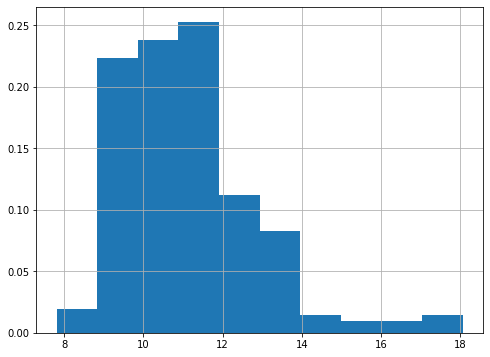

In [69]:
# engine size is not normally distributed, Try to make normal by using square root values
sqrt_engSize = np.sqrt(df['engine-size'])
sqrt_engSize = sqrt_engSize.sort_values()
sqrt_engSize.hist(density=True)

In [70]:
# use MLE to find the parameters (mu and sigma) of the normal distribution that would best describe transformed data
from scipy.stats import norm

mu, sigma = norm.fit(sqrt_engSize)
print(mu, sigma)

11.138608712150505 1.6754157239778287


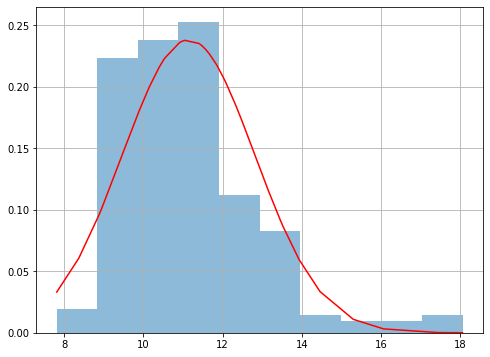

In [71]:
# get the probability density function parametrised by our estimated parameters
sqrt_engSize_normal = norm.pdf(sqrt_engSize, loc=mu, scale=sigma)

sqrt_engSize.hist(density=True, alpha=0.5)
plt.plot(sqrt_engSize, sqrt_engSize_normal, color='red')

In [72]:
# Summarize basic statistics of the dataframe
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


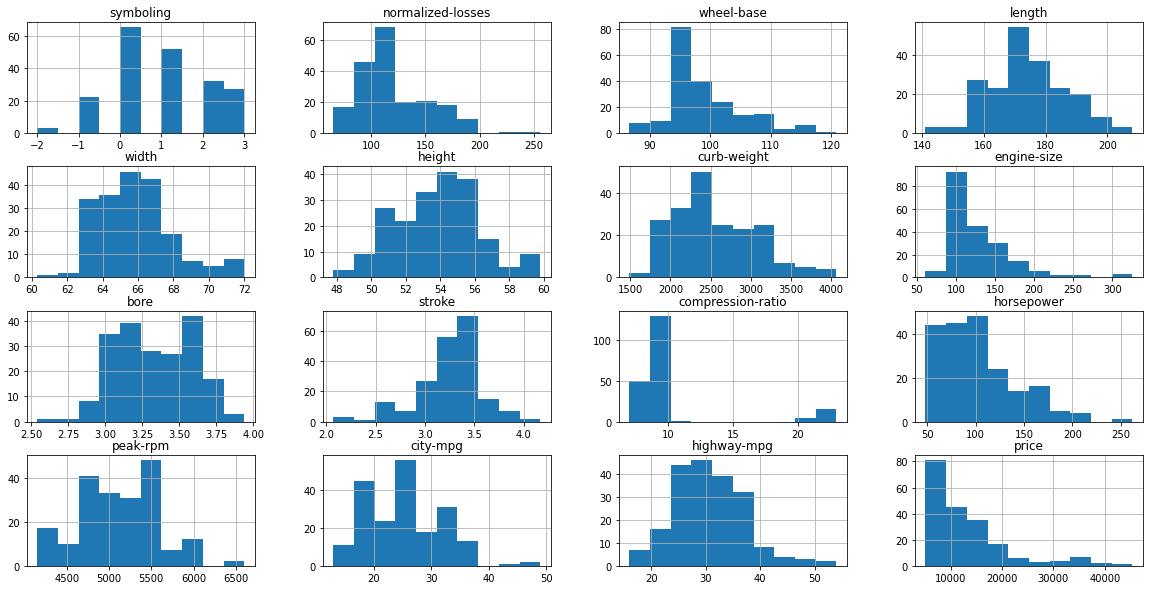

In [73]:
# Visualize histogram of dataset
df.hist(figsize= (20,10), bins= 10)
plt.show()

In [74]:
for column in df[numerical_col].columns:
    print(column)
    print("skewness:", df[column].skew())
    print("kurtosis:", df[column].kurtosis())
    print('\n')

symboling
skewness: 0.19737036029756264
kurtosis: -0.7071776171630866


normalized-losses
skewness: 0.8465463512727495
kurtosis: 1.319067556644609


wheel-base
skewness: 1.0312614426719533
kurtosis: 0.948445096054463


length
skewness: 0.15444635183586677
kurtosis: -0.06519162777008303


width
skewness: 0.8750290419412816
kurtosis: 0.6786551692228984


height
skewness: 0.029173299149270183
kurtosis: -0.4329081504305292


curb-weight
skewness: 0.7058035875297635
kurtosis: 0.034915576048686336


engine-size
skewness: 1.9791441966363523
kurtosis: 5.497490766643349


bore
skewness: -0.032946155593633106
kurtosis: -0.7981824583683212


stroke
skewness: -0.7006789884680729
kurtosis: 2.13013122019491


compression-ratio
skewness: 2.5844624326120726
kurtosis: 5.068872476264779


horsepower
skewness: 1.1472194853539708
kurtosis: 1.3214960007338394


peak-rpm
skewness: 0.10826107052388645
kurtosis: 0.10763874032826992


city-mpg
skewness: 0.6804334707346078
kurtosis: 0.7539680878039432


highway

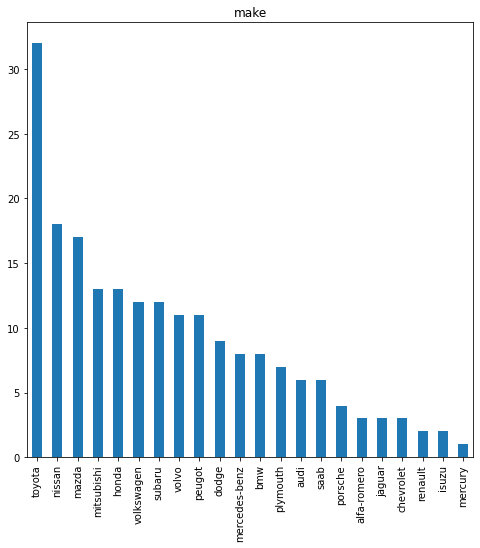

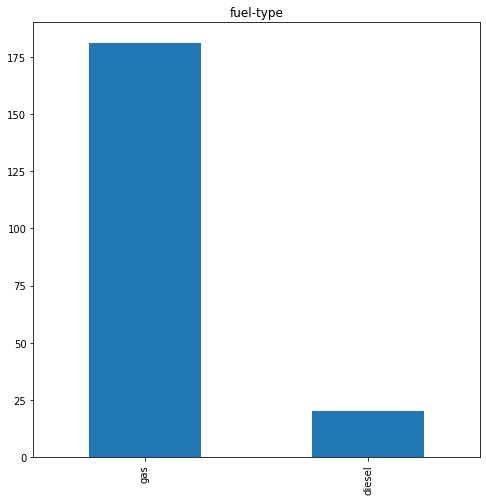

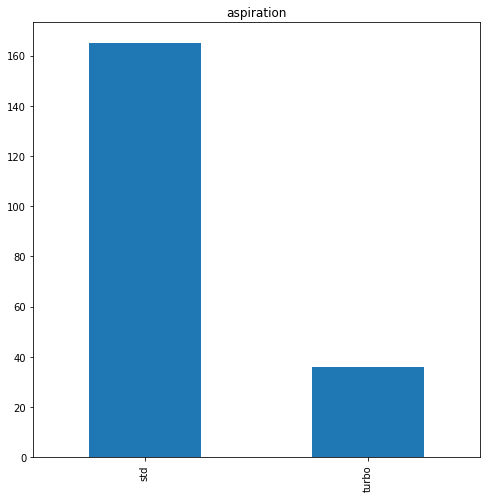

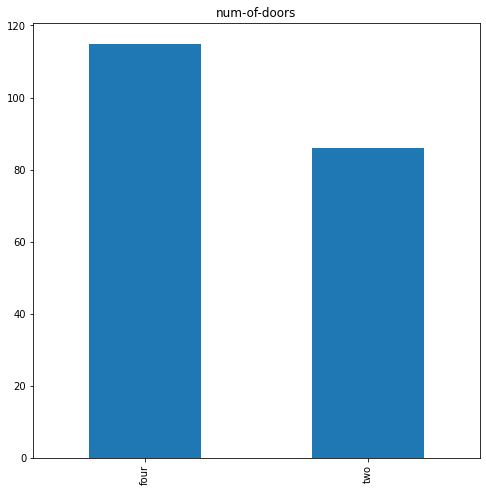

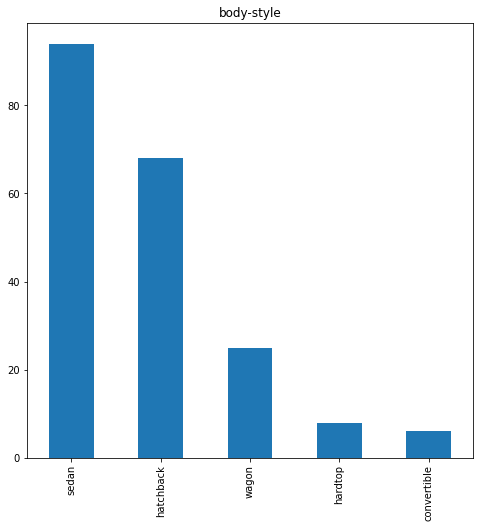

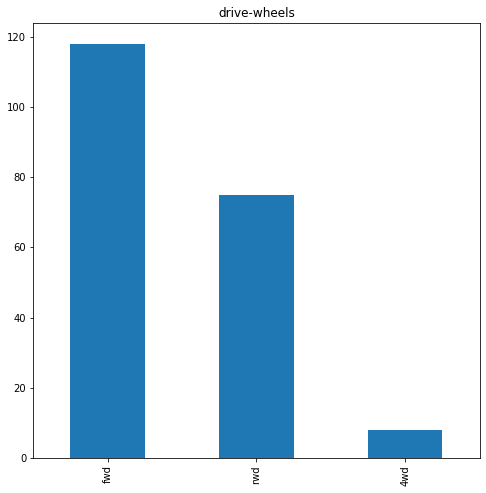

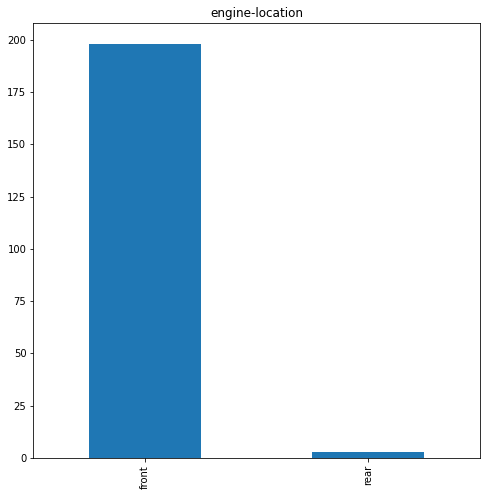

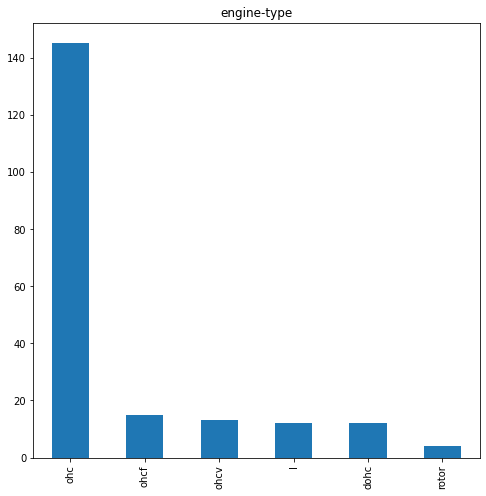

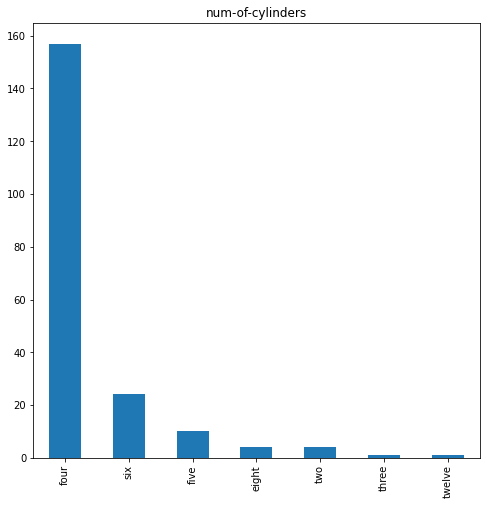

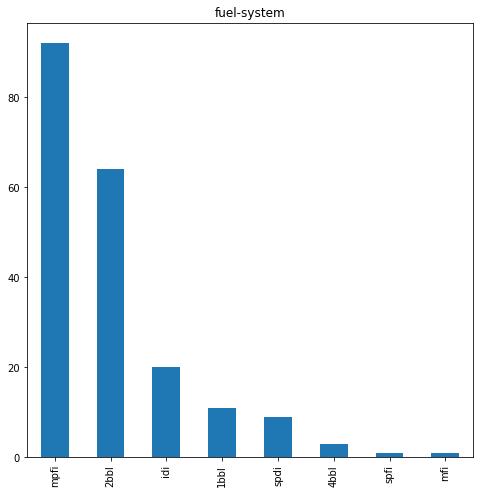

In [75]:
# visualizing categorical features using bar graphs
normal_figure = (8, 8)
for column in df[categorical_col].columns:
  df[column].value_counts().plot.bar(figsize=normal_figure, title= column)
  plt.show()

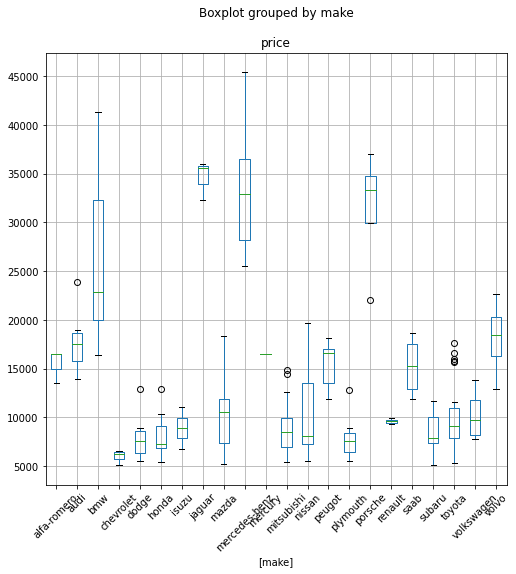

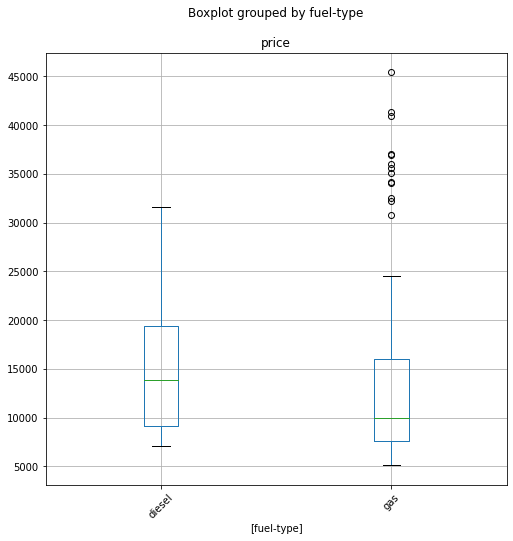

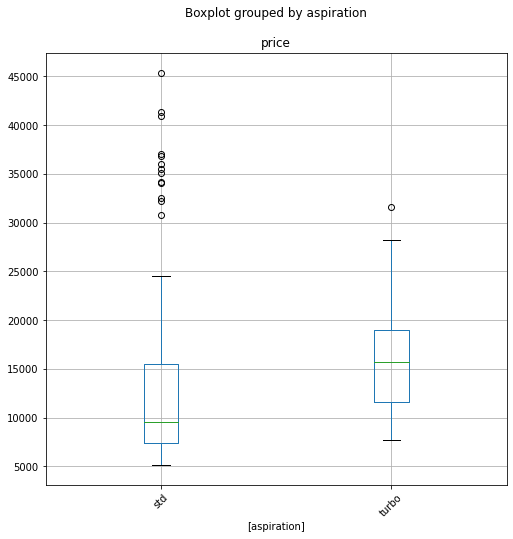

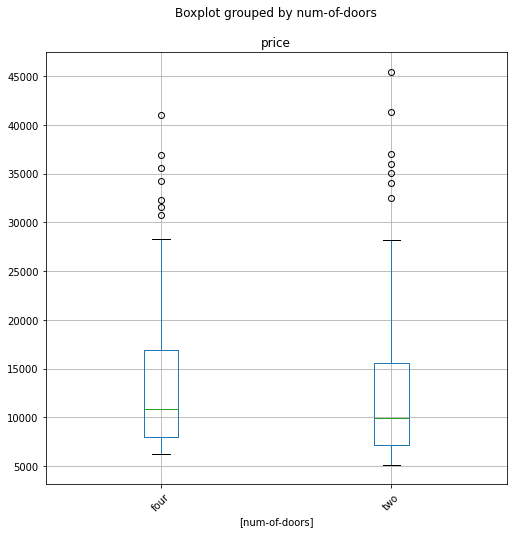

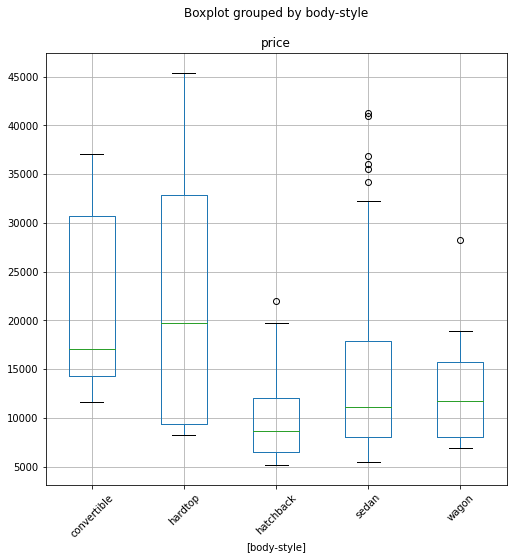

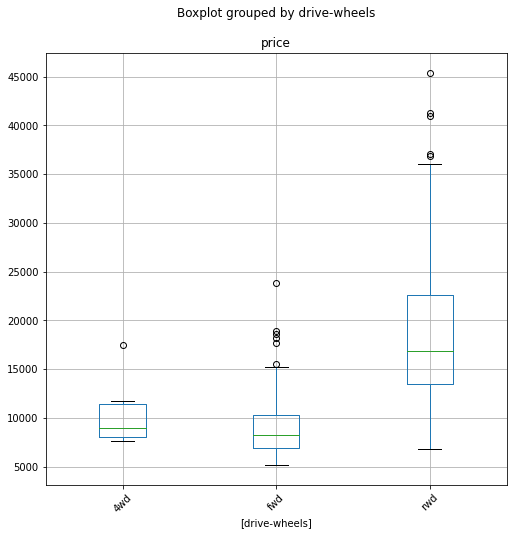

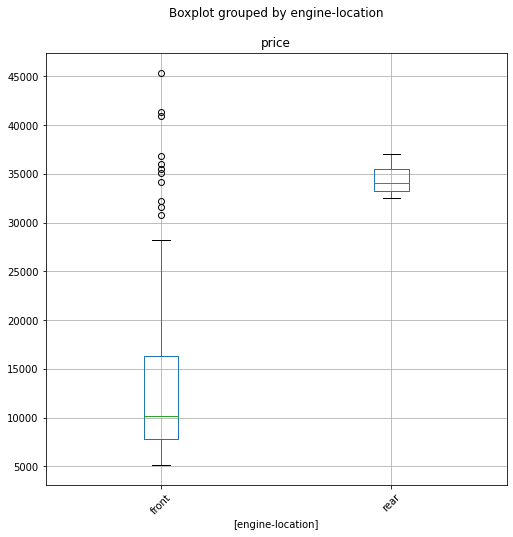

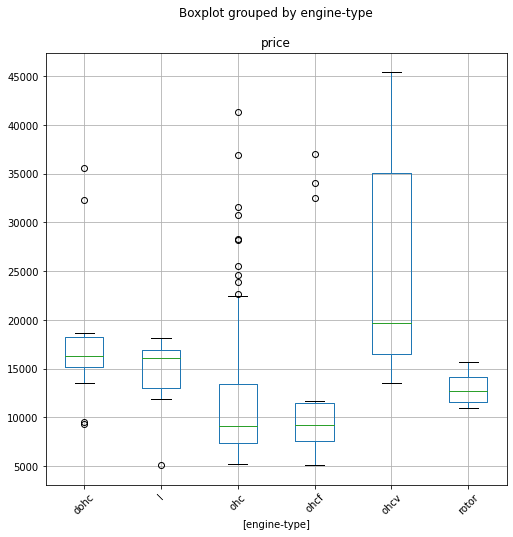

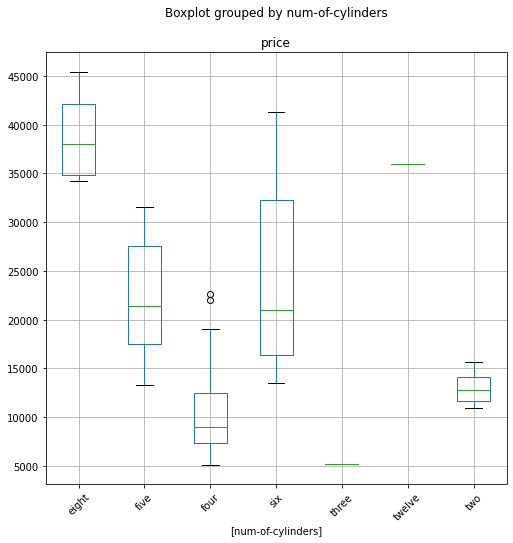

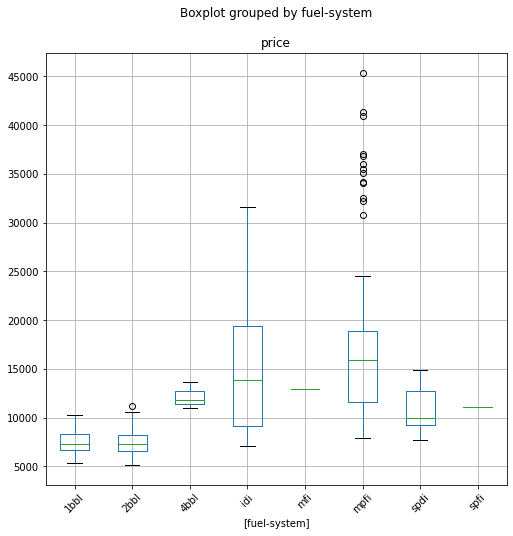

In [76]:
# visualizing categorical features using box plots
normal_figure = (8, 8)
for column in df[categorical_col].columns:
  df[[column, 'price']].boxplot(by= column, rot=45, figsize=normal_figure)
  plt.show()

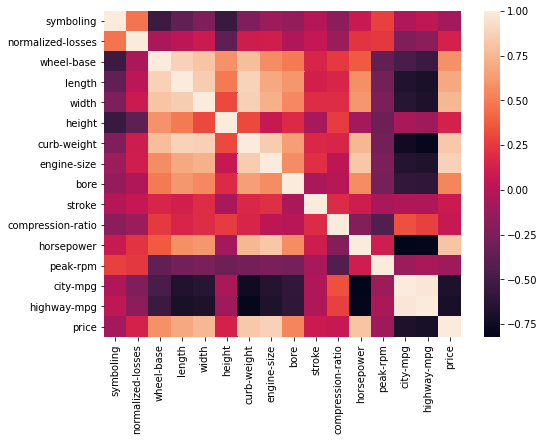

In [77]:
# Examine correlation matrix
corr_matrix = df.corr()
corr = sea.heatmap(corr_matrix )

In [78]:
# Check for correlation between variables
df.corr(method = 'spearman')

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.483960,-0.542030,-0.404203,-0.260553,-0.529907,-0.260517,-0.181819,-0.178442,-0.015937,0.020986,-0.004021,0.290138,-0.021918,0.050444,-0.142683
normalized-losses,0.483960,1.000000,-0.072600,0.045926,0.117695,-0.345880,0.123187,0.124089,-0.021328,0.099416,-0.067848,0.236603,0.241301,-0.258637,-0.209499,0.202034
wheel-base,-0.542030,-0.072600,1.000000,0.913120,0.815524,0.641402,0.764638,0.645661,0.536986,0.221315,-0.119545,0.495114,-0.316128,-0.484472,-0.531121,0.681790
length,-0.404203,0.045926,0.913120,1.000000,0.889761,0.532213,0.889759,0.779691,0.639137,0.178648,-0.180277,0.660012,-0.271673,-0.661012,-0.688778,0.810331
width,-0.260553,0.117695,0.815524,0.889761,1.000000,0.370636,0.858624,0.762966,0.607031,0.236914,-0.138980,0.681364,-0.213543,-0.673376,-0.692498,0.812097
height,-0.529907,-0.345880,0.641402,0.532213,0.370636,1.000000,0.362877,0.208611,0.221354,-0.027400,0.008056,0.021625,-0.279633,-0.079883,-0.137731,0.263806
curb-weight,-0.260517,0.123187,0.764638,0.889759,0.858624,0.362877,1.000000,0.874364,0.702222,0.156648,-0.213276,0.804234,-0.247198,-0.805613,-0.830918,0.913767
engine-size,-0.181819,0.124089,0.645661,0.779691,0.762966,0.208611,0.874364,1.000000,0.696128,0.292150,-0.233197,0.818438,-0.282721,-0.722111,-0.716830,0.828417
bore,-0.178442,-0.021328,0.536986,0.639137,0.607031,0.221354,0.702222,0.696128,1.000000,-0.084952,-0.168194,0.640812,-0.304192,-0.608772,-0.620782,0.646417
stroke,-0.015937,0.099416,0.221315,0.178648,0.236914,-0.027400,0.156648,0.292150,-0.084952,1.000000,-0.055001,0.135682,-0.071172,-0.018086,-0.015152,0.112829


### Feature Engineering

In [79]:
# Encode categorical data using label Encoder
df_Enc = df.copy()
from sklearn.preprocessing import LabelEncoder
Enc = LabelEncoder()
df_Enc[categorical_col] = df_Enc[categorical_col].apply(Enc.fit_transform)

df_Enc.to_csv('LabelEncClean.csv')
df_Enc.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,4,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,2,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,2,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [80]:
# Check for outliers
from scipy import stats
zscore = np.abs(stats.zscore(df_Enc))
zscore

# remove all data with outliers
df2 = df_Enc
df2 = df2[(zscore <3).all(axis = 1)]
print("Shape of the original dataframe is :", df_Enc.shape)
print("Shape of the clean dataframe is :", df.shape)

del_entries = df_Enc.shape[0] - df2.shape[0]
print("Entries deleted in the dataframe are :",  del_entries)

Shape of the original dataframe is : (201, 26)
Shape of the clean dataframe is : (201, 26)
Entries deleted in the dataframe are : 47


###Varying Data set size
####1] 80% training to 20% validation 

In [81]:
#  Split data into atrributes and target variables
# where, x = attributes and y = target (price) 
x = df2.iloc[:, :-1] # dataframe
y = df2.iloc[:,-1] 
print(x.shape)
print(y.shape)

(154, 25)
(154,)


In [82]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.20, random_state = 1)
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(123, 25)
(31, 25)
(123,)
(31,)


In [83]:
# Feature Selection to select top best 9 attributes
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Keep 5 most influential features
selector_fclass = SelectKBest(mutual_info_regression, 5)
Xtrain_new = selector_fclass.fit_transform(x_train, y_train)

#Get back only the features we've kept, zero out all other features
selected_features_fclass = pd.DataFrame(selector_fclass.inverse_transform(Xtrain_new),
                                 index=x_train.index,
                                 columns=x.columns)
selected_features_fclass.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.8,0.0,1967.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0.0,31.0,38.0
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.6,0.0,2015.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,31.0,38.0
142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.4,0.0,2190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,0.0,28.0,33.0
102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.5,0.0,3296.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152.0,0.0,17.0,22.0
173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.5,0.0,2326.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,0.0,29.0,34.0


In [84]:
# Drop unselected columns
selected_columns = selected_features_fclass.columns[selected_features_fclass.var() != 0]
selected_columns

# Get the validation dataset with the selected features.
x_train[selected_columns].head()

,width,curb-weight,horsepower,city-mpg,highway-mpg
24,63.8,1967,68.0,31,38
152,63.6,2015,62.0,31,38
142,65.4,2190,82.0,28,33
102,66.5,3296,152.0,17,22
173,66.5,2326,92.0,29,34


In [85]:
x_train

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
24,1,148.0,4,1,0,0,2,1,0,93.7,157.3,63.8,50.6,1967,2,2,90,1,2.97,3.23,9.4,68.0,5500.0,31,38
152,1,74.0,19,1,0,0,2,1,0,95.7,158.7,63.6,54.5,2015,2,2,92,1,3.05,3.03,9.0,62.0,4800.0,31,38
142,0,102.0,18,1,0,0,3,1,0,97.2,172.0,65.4,52.5,2190,3,2,108,1,3.62,2.64,9.5,82.0,4400.0,28,33
102,0,108.0,12,1,0,0,4,1,0,100.4,184.6,66.5,56.1,3296,4,3,181,5,3.43,3.27,9.0,152.0,5200.0,17,22
173,-1,65.0,19,1,0,0,3,1,0,102.4,175.6,66.5,54.9,2326,2,2,122,5,3.31,3.54,8.7,92.0,4200.0,29,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,-1,65.0,19,1,0,0,2,1,0,102.4,175.6,66.5,53.9,2458,2,2,122,5,3.31,3.54,8.7,92.0,4200.0,27,32
181,-1,122.0,19,1,0,0,4,2,0,104.5,187.8,66.5,54.1,3151,0,3,161,5,3.27,3.35,9.2,156.0,5200.0,19,24
97,1,103.0,12,1,0,0,4,1,0,94.5,170.2,63.8,53.5,2037,2,2,97,1,3.15,3.29,9.4,69.0,5200.0,31,37
186,2,94.0,20,1,0,0,3,1,0,97.3,171.7,65.5,55.7,2275,2,2,109,5,3.19,3.40,9.0,85.0,5250.0,27,34


In [86]:
# Convert x_train, y_train, x_test, y_test into arrays
x_train = x_train[selected_columns].values
x_valid = x_valid[selected_columns].values
y_train = y_train.values
y_valid = y_valid.values

# Training the Linear Regression model on the whole dataset
test_error = []
train_error = []
score = []
poly_orders = [1, 2, 3, 4, 5, 6, 7, 8, 9]


# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

for orders in poly_orders:
    print("The order of the polynomial is", orders)
    poly_reg = PolynomialFeatures(degree = orders)
    x_poly_train = poly_reg.fit_transform(x_train)
    x_poly_test = poly_reg.transform(x_valid)

    # Build MLR model
    regressor = LinearRegression()
    regressor.fit(x_poly_train, y_train)
    y_pred   = regressor.predict(x_poly_test)
    y_hat   = regressor.predict(x_poly_train)
    rmse_train= np.sqrt(mean_squared_error(y_train,y_hat))
    rmse_test = np.sqrt(mean_squared_error(y_valid,y_pred) )

    print( "RMSE for train set is",  rmse_train )
    print("R2- score for tRAIN set: %.2f" % r2_score(y_train,y_hat))
    print( "RMSE for test set is",  rmse_test)
    print("R2- score for test set: %.2f" % r2_score(y_valid,y_pred))
    print("-" *12)
    train_error.append(rmse_train)
    test_error.append(rmse_test)
    score.append(r2_score(y_valid,y_pred))

The order of the polynomial is 1
RMSE for train set is 2822.7303139677947
R2- score for tRAIN set: 0.76
RMSE for test set is 2003.1278109554496
R2- score for test set: 0.83
------------
The order of the polynomial is 2
RMSE for train set is 2211.088550997677
R2- score for tRAIN set: 0.85
RMSE for test set is 1767.0698154576096
R2- score for test set: 0.87
------------
The order of the polynomial is 3
RMSE for train set is 2035.5150668869871
R2- score for tRAIN set: 0.87
RMSE for test set is 4463.860645667041
R2- score for test set: 0.14
------------
The order of the polynomial is 4
RMSE for train set is 272.4587068364474
R2- score for tRAIN set: 1.00
RMSE for test set is 23063.239401744406
R2- score for test set: -21.90
------------
The order of the polynomial is 5
RMSE for train set is 696.2382465992117
R2- score for tRAIN set: 0.99
RMSE for test set is 176195.33347159126
R2- score for test set: -1335.82
------------
The order of the polynomial is 6
RMSE for train set is 719.430757322

####2] 90% training and 10% training 

In [87]:
#  Split data into atrributes and target variables
# where, x1 = attributes and y1 = target (price) 
x1 = df2.iloc[:, :-1] # dataframe
y1 = df2.iloc[:,-1] 

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x1_train, x1_valid, y1_train, y1_valid = train_test_split(x1, y1, test_size = 0.10, random_state = 1)

# Feature Selection to select top best 5 attributes
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Keep 5 most influential features
selector_fclass = SelectKBest(mutual_info_regression, 5)
Xtrain_new = selector_fclass.fit_transform(x1_train, y1_train)

#Get back only the features we've kept, zero out all other features
selected_features_fclass = pd.DataFrame(selector_fclass.inverse_transform(Xtrain_new),
                                 index=x1_train.index,
                                 columns=x1.columns)
selected_features_fclass.head()

# Drop unselected columns
selected_columns = selected_features_fclass.columns[selected_features_fclass.var() != 0]
selected_columns

# Get the validation dataset with the selected features.
x1_train[selected_columns].head()
x1_train

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
21,1,118.0,4,1,0,1,2,1,0,93.7,157.3,63.8,50.8,1876,2,2,90,1,2.97,3.23,9.41,68.0,5500.0,37,41
188,2,94.0,20,1,0,0,3,1,0,97.3,171.7,65.5,55.7,2300,2,2,109,5,3.19,3.40,10.00,100.0,5500.0,26,32
122,1,154.0,14,1,0,0,3,1,0,93.7,167.3,63.8,50.8,2191,2,2,98,1,2.97,3.23,9.40,68.0,5500.0,31,38
132,3,150.0,17,1,0,1,2,1,0,99.1,186.6,66.5,56.1,2658,2,2,121,5,3.54,3.07,9.31,110.0,5250.0,21,28
124,3,122.0,14,1,1,1,2,2,0,95.9,173.2,66.3,50.2,2818,2,2,156,6,3.59,3.86,7.00,145.0,5000.0,19,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,-1,65.0,19,1,0,0,2,1,0,102.4,175.6,66.5,53.9,2458,2,2,122,5,3.31,3.54,8.70,92.0,4200.0,27,32
181,-1,122.0,19,1,0,0,4,2,0,104.5,187.8,66.5,54.1,3151,0,3,161,5,3.27,3.35,9.20,156.0,5200.0,19,24
97,1,103.0,12,1,0,0,4,1,0,94.5,170.2,63.8,53.5,2037,2,2,97,1,3.15,3.29,9.40,69.0,5200.0,31,37
186,2,94.0,20,1,0,0,3,1,0,97.3,171.7,65.5,55.7,2275,2,2,109,5,3.19,3.40,9.00,85.0,5250.0,27,34


In [88]:
# Convert x1_train, y1_train, x1_test, y1_test into arrays
x1_train = x1_train[selected_columns].values
x1_valid = x1_valid[selected_columns].values
y1_train = y1_train.values
y1_valid = y1_valid.values

# Training the Linear Regression model on the whole dataset
test_error = []
train_error = []
score = []
poly_orders = [1, 2, 3, 4, 5, 6, 7, 8, 9]


# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

for orders in poly_orders:
    print("The order of the polynomial is", orders)
    poly_reg = PolynomialFeatures(degree = orders)
    x1_poly_train = poly_reg.fit_transform(x1_train)
    x1_poly_test = poly_reg.transform(x1_valid)

    # Build MLR model
    regressor = LinearRegression()
    regressor.fit(x1_poly_train, y1_train)
    y1_pred   = regressor.predict(x1_poly_test)
    y1_hat   = regressor.predict(x1_poly_train)
    rmse_train= np.sqrt(mean_squared_error(y1_train,y1_hat))
    rmse_test = np.sqrt(mean_squared_error(y1_valid,y1_pred) )

    print( "RMSE for train set is",  rmse_train )
    print("R2- score for tRAIN set: %.2f" % r2_score(y1_train,y1_hat))
    print( "RMSE for test set is",  rmse_test)
    print("R2- score for test set: %.2f" % r2_score(y1_valid,y1_pred))
    print("-" *12)
    train_error.append(rmse_train)
    test_error.append(rmse_test)
    score.append(r2_score(y1_valid,y1_pred))

The order of the polynomial is 1
RMSE for train set is 2763.18409479986
R2- score for tRAIN set: 0.76
RMSE for test set is 1745.7980056274598
R2- score for test set: 0.89
------------
The order of the polynomial is 2
RMSE for train set is 2175.0630775697186
R2- score for tRAIN set: 0.85
RMSE for test set is 1559.5659435611667
R2- score for test set: 0.91
------------
The order of the polynomial is 3
RMSE for train set is 6916.023970434745
R2- score for tRAIN set: -0.53
RMSE for test set is 11556.78244706651
R2- score for test set: -4.03
------------
The order of the polynomial is 4
RMSE for train set is 409.2960608332759
R2- score for tRAIN set: 0.99
RMSE for test set is 12200.633338496244
R2- score for test set: -4.61
------------
The order of the polynomial is 5
RMSE for train set is 247.6965169109638
R2- score for tRAIN set: 1.00
RMSE for test set is 53808.74198993156
R2- score for test set: -108.06
------------
The order of the polynomial is 6
RMSE for train set is 257.552137396483

####3] 70% training and 30% test

In [89]:
#  Split data into atrributes and target variables
# where, x2 = attributes and y2 = target (price) 
x2 = df2.iloc[:, :-1] # dataframe
y2 = df2.iloc[:,-1] 

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x2_train, x2_valid, y2_train, y2_valid = train_test_split(x2, y2, test_size = 0.30, random_state = 1)

# Feature Selection to select top best 5 attributes
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Keep 5 most influential features
selector_fclass = SelectKBest(mutual_info_regression, 5)
Xtrain_new = selector_fclass.fit_transform(x2_train, y2_train)

#Get back only the features we've kept, zero out all other features
selected_features_fclass = pd.DataFrame(selector_fclass.inverse_transform(Xtrain_new),
                                 index=x2_train.index,
                                 columns=x2.columns)
selected_features_fclass.head()

# Drop unselected columns
selected_columns = selected_features_fclass.columns[selected_features_fclass.var() != 0]
selected_columns

# Get the validation dataset with the selected features.
x2_train[selected_columns].head()
x2_train

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
98,2,168.0,12,1,0,1,1,1,0,95.1,162.4,63.8,53.3,2008,2,2,97,1,3.15,3.29,9.4,69.0,5200.0,31,37
23,1,118.0,4,1,1,1,2,1,0,93.7,157.3,63.8,50.8,2128,2,2,98,5,3.03,3.39,7.6,102.0,5500.0,24,30
64,0,115.0,8,1,0,0,2,1,0,98.8,177.8,66.5,55.5,2425,2,2,122,1,3.39,3.39,8.6,84.0,4800.0,26,32
6,1,158.0,1,1,0,0,3,1,0,105.8,192.7,71.4,55.7,2844,2,1,136,5,3.19,3.40,8.5,110.0,5500.0,19,25
60,0,115.0,8,1,0,0,3,1,0,98.8,177.8,66.5,55.5,2410,2,2,122,1,3.39,3.39,8.6,84.0,4800.0,26,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,-1,65.0,19,1,0,0,2,1,0,102.4,175.6,66.5,53.9,2458,2,2,122,5,3.31,3.54,8.7,92.0,4200.0,27,32
181,-1,122.0,19,1,0,0,4,2,0,104.5,187.8,66.5,54.1,3151,0,3,161,5,3.27,3.35,9.2,156.0,5200.0,19,24
97,1,103.0,12,1,0,0,4,1,0,94.5,170.2,63.8,53.5,2037,2,2,97,1,3.15,3.29,9.4,69.0,5200.0,31,37
186,2,94.0,20,1,0,0,3,1,0,97.3,171.7,65.5,55.7,2275,2,2,109,5,3.19,3.40,9.0,85.0,5250.0,27,34


In [90]:
# Convert x2_train, y2_train, x2_test, y2_test into arrays
x2_train = x2_train[selected_columns].values
x2_valid = x2_valid[selected_columns].values
y2_train = y2_train.values
y2_valid = y2_valid.values

# Training the Linear Regression model on the whole dataset
test_error = []
train_error = []
score = []
poly_orders = [1, 2, 3, 4, 5, 6, 7, 8, 9]


# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

for orders in poly_orders:
    print("The order of the polynomial is", orders)
    poly_reg = PolynomialFeatures(degree = orders)
    x2_poly_train = poly_reg.fit_transform(x2_train)
    x2_poly_test = poly_reg.transform(x2_valid)

    # Build MLR model
    regressor = LinearRegression()
    regressor.fit(x2_poly_train, y2_train)
    y2_pred   = regressor.predict(x2_poly_test)
    y2_hat   = regressor.predict(x2_poly_train)
    rmse_train= np.sqrt(mean_squared_error(y2_train,y2_hat))
    rmse_test = np.sqrt(mean_squared_error(y2_valid,y2_pred) )

    print( "RMSE for train set is",  rmse_train )
    print("R2- score for tRAIN set: %.2f" % r2_score(y2_train,y2_hat))
    print( "RMSE for test set is",  rmse_test)
    print("R2- score for test set: %.2f" % r2_score(y2_valid,y2_pred))
    print("-" *12)
    train_error.append(rmse_train)
    test_error.append(rmse_test)
    score.append(r2_score(y2_valid,y2_pred))

The order of the polynomial is 1
RMSE for train set is 2891.8927285303985
R2- score for tRAIN set: 0.76
RMSE for test set is 2233.3048434502507
R2- score for test set: 0.75
------------
The order of the polynomial is 2
RMSE for train set is 2210.3468918010353
R2- score for tRAIN set: 0.86
RMSE for test set is 2265.2390182126874
R2- score for test set: 0.75
------------
The order of the polynomial is 3
RMSE for train set is 1696.6618131048433
R2- score for tRAIN set: 0.92
RMSE for test set is 5300.6138328376155
R2- score for test set: -0.39
------------
The order of the polynomial is 4
RMSE for train set is 417.81700654375965
R2- score for tRAIN set: 0.99
RMSE for test set is 686388.8185721822
R2- score for test set: -23373.02
------------
The order of the polynomial is 5
RMSE for train set is 240.8678000286937
R2- score for tRAIN set: 1.00
RMSE for test set is 596093.2268189983
R2- score for test set: -17627.75
------------
The order of the polynomial is 6
RMSE for train set is 182.168

####4] 60% training and 40% validation 

In [91]:
#  Split data into atrributes and target variables
# where, x3 = attributes and y3 = target (price) 
x3 = df2.iloc[:, :-1] # dataframe
y3 = df2.iloc[:,-1] 

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x3_train, x3_valid, y3_train, y3_valid = train_test_split(x3, y3, test_size = 0.40, random_state = 1)

# Feature Selection to select top best 5 attributes
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Keep 5 most influential features
selector_fclass = SelectKBest(mutual_info_regression, 5)
Xtrain_new = selector_fclass.fit_transform(x3_train, y3_train)

#Get back only the features we've kept, zero out all other features
selected_features_fclass = pd.DataFrame(selector_fclass.inverse_transform(Xtrain_new),
                                 index=x3_train.index,
                                 columns=x3.columns)
selected_features_fclass.head()

# Drop unselected columns
selected_columns = selected_features_fclass.columns[selected_features_fclass.var() != 0]
selected_columns

# Get the validation dataset with the selected features.
x3_train[selected_columns].head()
x3_train

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
200,-1,95.0,21,1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,2,2,141,5,3.78,3.15,9.5,114.0,5400.0,23,28
14,1,122.0,2,1,0,0,3,2,0,103.5,189.0,66.9,55.7,3055,2,3,164,5,3.31,3.19,9.0,121.0,4250.0,20,25
163,1,168.0,19,1,0,1,3,2,0,94.5,168.7,64.0,52.6,2169,2,2,98,1,3.19,3.03,9.0,70.0,4800.0,29,34
4,2,164.0,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,2,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22
161,0,91.0,19,1,0,0,2,1,0,95.7,166.3,64.4,52.8,2122,2,2,98,1,3.19,3.03,9.0,70.0,4800.0,28,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,-1,65.0,19,1,0,0,2,1,0,102.4,175.6,66.5,53.9,2458,2,2,122,5,3.31,3.54,8.7,92.0,4200.0,27,32
181,-1,122.0,19,1,0,0,4,2,0,104.5,187.8,66.5,54.1,3151,0,3,161,5,3.27,3.35,9.2,156.0,5200.0,19,24
97,1,103.0,12,1,0,0,4,1,0,94.5,170.2,63.8,53.5,2037,2,2,97,1,3.15,3.29,9.4,69.0,5200.0,31,37
186,2,94.0,20,1,0,0,3,1,0,97.3,171.7,65.5,55.7,2275,2,2,109,5,3.19,3.40,9.0,85.0,5250.0,27,34


In [92]:
# Convert x3_train, y3_train, x3_test, y3_test into arrays
x3_train = x3_train[selected_columns].values
x3_valid = x3_valid[selected_columns].values
y3_train = y3_train.values
y3_valid = y3_valid.values

# Training the Linear Regression model on the whole dataset
test_error = []
train_error = []
score = []
poly_orders = [1, 2, 3, 4, 5, 6, 7, 8, 9]


# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

for orders in poly_orders:
    print("The order of the polynomial is", orders)
    poly_reg = PolynomialFeatures(degree = orders)
    x3_poly_train = poly_reg.fit_transform(x3_train)
    x3_poly_test = poly_reg.transform(x3_valid)

    # Build MLR model
    regressor = LinearRegression()
    regressor.fit(x3_poly_train, y3_train)
    y3_pred   = regressor.predict(x3_poly_test)
    y3_hat   = regressor.predict(x3_poly_train)
    rmse_train= np.sqrt(mean_squared_error(y3_train,y3_hat))
    rmse_test = np.sqrt(mean_squared_error(y3_valid,y3_pred) )

    print( "RMSE for train set is",  rmse_train )
    print("R2- score for tRAIN set: %.2f" % r2_score(y3_train,y3_hat))
    print( "RMSE for test set is",  rmse_test)
    print("R2- score for test set: %.2f" % r2_score(y3_valid,y3_pred))
    print("-" *12)
    train_error.append(rmse_train)
    test_error.append(rmse_test)
    score.append(r2_score(y3_valid,y3_pred))

The order of the polynomial is 1
RMSE for train set is 2909.7316471822014
R2- score for tRAIN set: 0.75
RMSE for test set is 2348.517674823867
R2- score for test set: 0.78
------------
The order of the polynomial is 2
RMSE for train set is 2157.2067089362913
R2- score for tRAIN set: 0.86
RMSE for test set is 2433.6127899571347
R2- score for test set: 0.77
------------
The order of the polynomial is 3
RMSE for train set is 8649.667767578561
R2- score for tRAIN set: -1.20
RMSE for test set is 17990.650833741183
R2- score for test set: -11.75
------------
The order of the polynomial is 4
RMSE for train set is 120.9802398369666
R2- score for tRAIN set: 1.00
RMSE for test set is 179154.23686523223
R2- score for test set: -1263.55
------------
The order of the polynomial is 5
RMSE for train set is 116.66196566809114
R2- score for tRAIN set: 1.00
RMSE for test set is 351305.4203395336
R2- score for test set: -4861.40
------------
The order of the polynomial is 6
RMSE for train set is 116.4043

####5] 50% training and 50% validation

In [93]:
#  Split data into atrributes and target variables
# where, x4 = attributes and y4 = target (price) 
x4 = df2.iloc[:, :-1] # dataframe
y4 = df2.iloc[:,-1] 

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x4_train, x4_valid, y4_train, y4_valid = train_test_split(x4, y4, test_size = 0.50, random_state = 1)

# Feature Selection to select top best 5 attributes
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Keep 5 most influential features
selector_fclass = SelectKBest(mutual_info_regression, 5)
Xtrain_new = selector_fclass.fit_transform(x4_train, y4_train)

#Get back only the features we've kept, zero out all other features
selected_features_fclass = pd.DataFrame(selector_fclass.inverse_transform(Xtrain_new),
                                 index=x4_train.index,
                                 columns=x4.columns)
selected_features_fclass.head()

# Drop unselected columns
selected_columns = selected_features_fclass.columns[selected_features_fclass.var() != 0]
selected_columns

# Get the validation dataset with the selected features.
x4_train[selected_columns].head()
x4_train

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
156,0,91.0,19,1,0,0,3,1,0,95.7,166.3,64.4,53.0,2081,2,2,98,1,3.19,3.03,9.0,70.000000,4800.00000,30,37
131,2,122.0,16,1,0,1,2,1,0,96.1,176.8,66.6,50.5,2460,2,2,132,5,3.46,3.90,8.7,103.396985,5117.58794,23,31
140,2,83.0,18,1,0,1,2,0,0,93.3,157.3,63.8,55.7,2240,3,2,108,1,3.62,2.64,8.7,73.000000,4400.00000,26,31
123,-1,74.0,14,1,0,0,4,1,0,103.3,174.6,64.6,59.8,2535,2,2,122,1,3.35,3.46,8.5,88.000000,5000.00000,24,30
13,0,188.0,2,1,0,0,3,2,0,101.2,176.8,64.8,54.3,2765,2,3,164,5,3.31,3.19,9.0,121.000000,4250.00000,21,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,-1,65.0,19,1,0,0,2,1,0,102.4,175.6,66.5,53.9,2458,2,2,122,5,3.31,3.54,8.7,92.000000,4200.00000,27,32
181,-1,122.0,19,1,0,0,4,2,0,104.5,187.8,66.5,54.1,3151,0,3,161,5,3.27,3.35,9.2,156.000000,5200.00000,19,24
97,1,103.0,12,1,0,0,4,1,0,94.5,170.2,63.8,53.5,2037,2,2,97,1,3.15,3.29,9.4,69.000000,5200.00000,31,37
186,2,94.0,20,1,0,0,3,1,0,97.3,171.7,65.5,55.7,2275,2,2,109,5,3.19,3.40,9.0,85.000000,5250.00000,27,34


In [94]:
# Convert x4_train, y4_train, x4_test, y4_test into arrays
x4_train = x4_train[selected_columns].values
x4_valid = x4_valid[selected_columns].values
y4_train = y4_train.values
y4_valid = y4_valid.values

# Training the Linear Regression model on the whole dataset
test_error = []
train_error = []
score = []
poly_orders = [1, 2, 3, 4, 5, 6, 7, 8, 9]


# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

for orders in poly_orders:
    print("The order of the polynomial is", orders)
    poly_reg = PolynomialFeatures(degree = orders)
    x4_poly_train = poly_reg.fit_transform(x4_train)
    x4_poly_test = poly_reg.transform(x4_valid)

    # Build MLR model
    regressor = LinearRegression()
    regressor.fit(x4_poly_train, y4_train)
    y4_pred   = regressor.predict(x4_poly_test)
    y4_hat   = regressor.predict(x4_poly_train)
    rmse_train= np.sqrt(mean_squared_error(y4_train,y4_hat))
    rmse_test = np.sqrt(mean_squared_error(y4_valid,y4_pred) )

    print( "RMSE for train set is",  rmse_train )
    print("R2- score for tRAIN set: %.2f" % r2_score(y4_train,y4_hat))
    print( "RMSE for test set is",  rmse_test)
    print("R2- score for test set: %.2f" % r2_score(y4_valid,y4_pred))
    print("-" *12)
    train_error.append(rmse_train)
    test_error.append(rmse_test)
    score.append(r2_score(y4_valid,y4_pred))

The order of the polynomial is 1
RMSE for train set is 2984.8700397937073
R2- score for tRAIN set: 0.73
RMSE for test set is 2352.754146045604
R2- score for test set: 0.80
------------
The order of the polynomial is 2
RMSE for train set is 1916.1927852813442
R2- score for tRAIN set: 0.89
RMSE for test set is 4155.1960822329875
R2- score for test set: 0.38
------------
The order of the polynomial is 3
RMSE for train set is 4014.785398985117
R2- score for tRAIN set: 0.52
RMSE for test set is 21698.45701913111
R2- score for test set: -15.80
------------
The order of the polynomial is 4
RMSE for train set is 122.30509265955043
R2- score for tRAIN set: 1.00
RMSE for test set is 401196.5294473085
R2- score for test set: -5741.85
------------
The order of the polynomial is 5
RMSE for train set is 122.31012969494441
R2- score for tRAIN set: 1.00
RMSE for test set is 354998.44532048306
R2- score for test set: -4495.41
------------
The order of the polynomial is 6
RMSE for train set is 122.32422